In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

- ___'Daily Time Spent on Site'___: consumer time on site in minutes
- ___'Age'___: cutomer age in years
- ___'Area Income'___: Avg. Income of geographical area of consumer
- ___'Daily Internet Usage'___: Avg. minutes a day consumer is on the internet
- ___'Ad Topic Line'___: Headline of the advertisement
- ___'City'___: City of consumer
- ___'Male'___: Whether or not consumer was male
- ___'Country'___: Country of consumer
- ___'Timestamp'___: Time at which consumer clicked on Ad or closed window
- ___'Clicked on Ad'___: 0 or 1 indicated clicking on Ad


### Import Libraries

In [1]:
## uncomment below line to install libraries needed for this project
# !pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay



### Read or Load Data

In [3]:
df = pd.read_csv('advertising.csv')

## Exploratory Data Analysis (EDA)

### Preview of data

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### checking descriptive stats

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


### Basic Data processing checks

### checking for NULL values

In [7]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

__No missing values or `null` values are present__

##### Check for Duplicates

In [8]:
df.duplicated().sum()

0

__There are no duplicate values.__

#### Histogram Distribution Plot for each numerical variable to check feature distributions

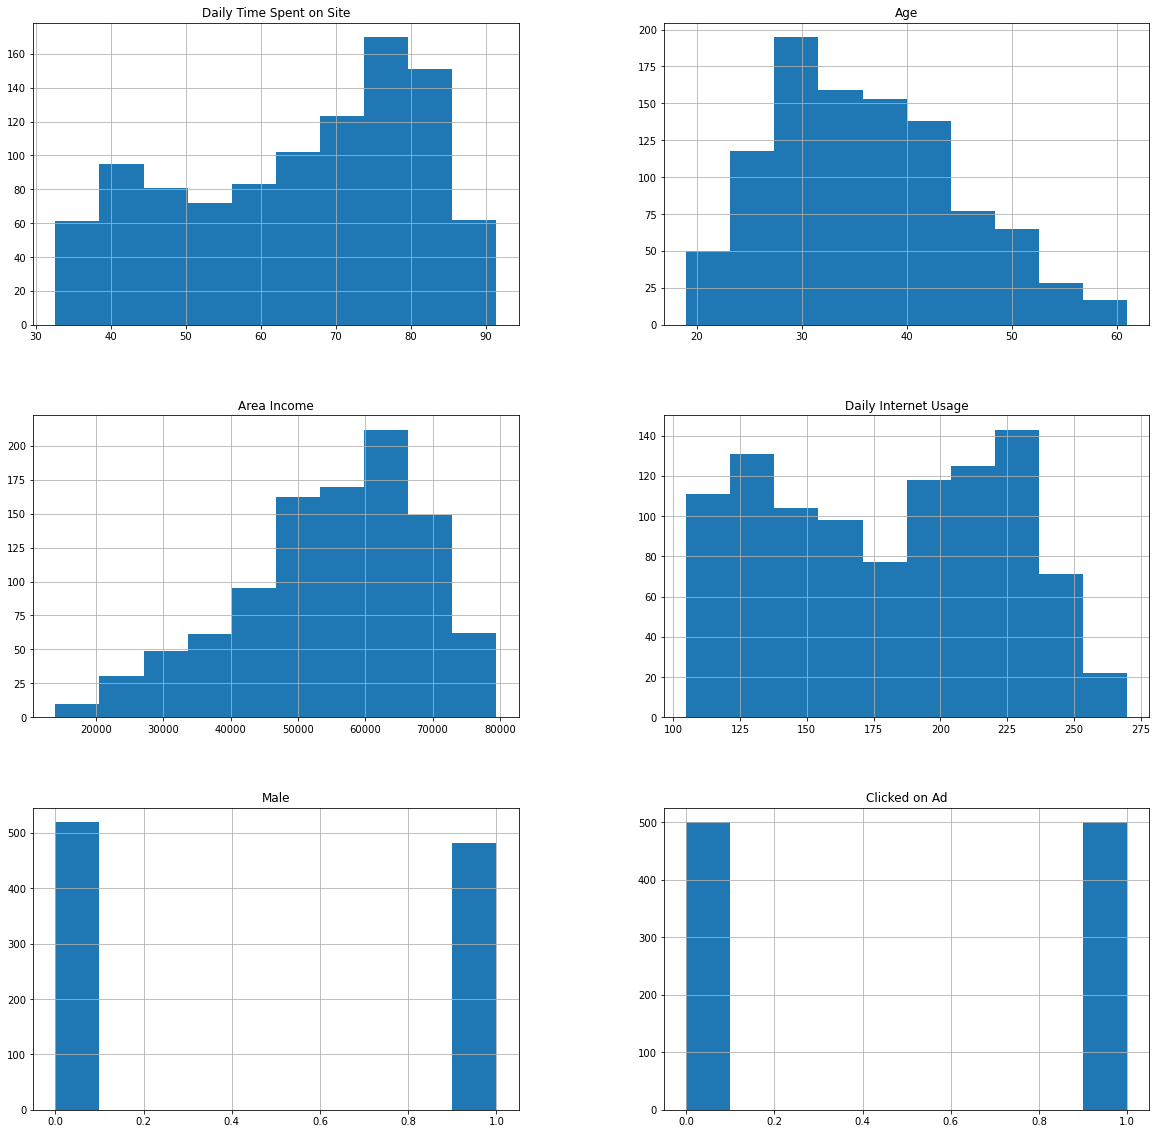

In [9]:
df.hist(figsize=(20,20))
plt.show()

### Pair Plot

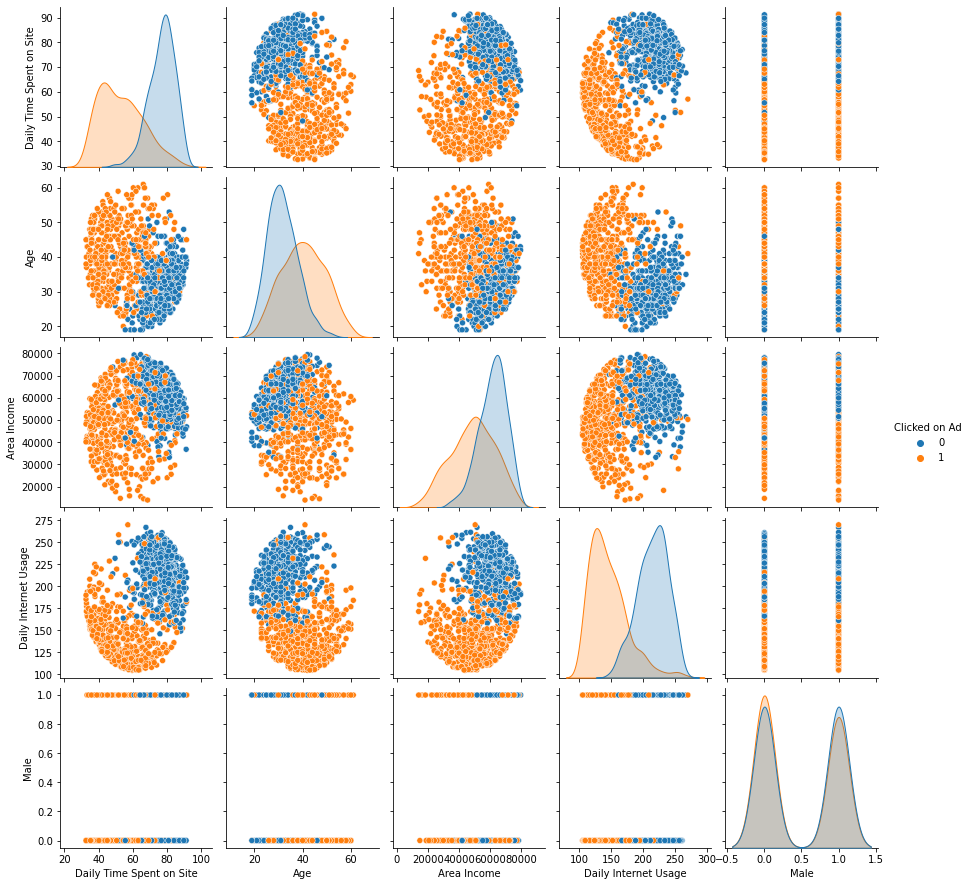

In [10]:
sns.pairplot(df, diag_kind='kde', hue='Clicked on Ad')
plt.show() 

### Jointplots with respect to `'Age'` feature

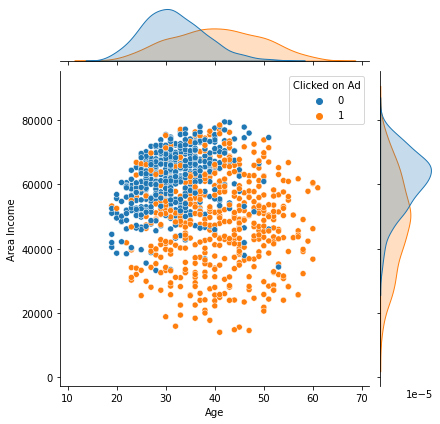

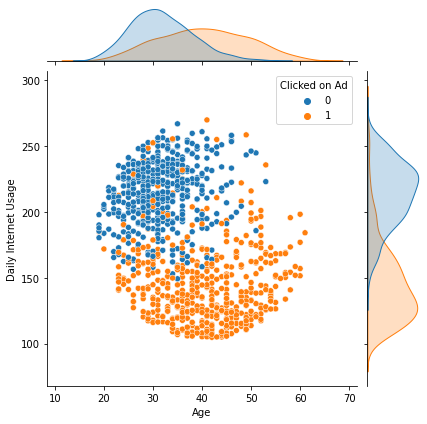

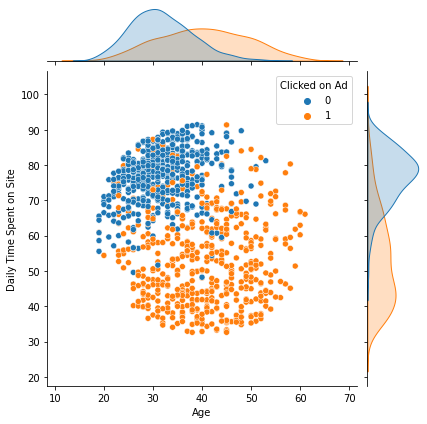

In [11]:
num_features = ['Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']
for num_feat in num_features:
    sns.jointplot(x='Age', y=num_feat, data=df, hue='Clicked on Ad')
    plt.show() 

### Categorical Plots with respect to target variable

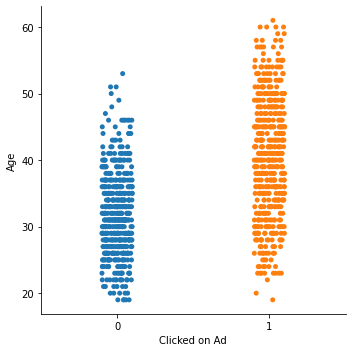

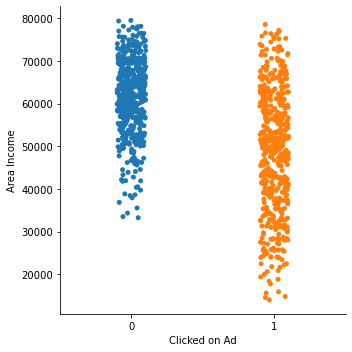

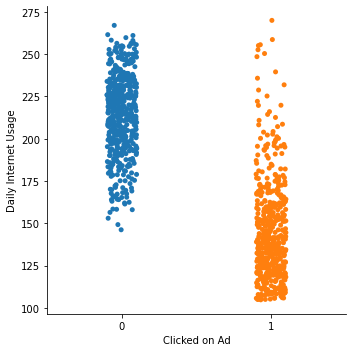

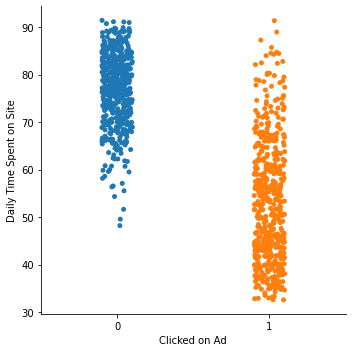

In [12]:
num_features = ['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']
for num_feat in num_features:
    sns.catplot(x='Clicked on Ad', y=num_feat, data=df)
    plt.show() 
 

### Split Data into different Training and Test Dataset  (75% Training Data / 25% Test or validation Data)

In [13]:
X = df[['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

## Logistic Regression Model (Training and Evaluation)

Accuracy with Training data: 0.8955223880597015
Accuracy with test data: 0.8878787878787879
Confusion Matrix for Logistic Regression Classifier Model: 
[[159   7]
 [ 30 134]]
Classification Report for Logistic Regression Classifier model: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       166
           1       0.95      0.82      0.88       164

    accuracy                           0.89       330
   macro avg       0.90      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330



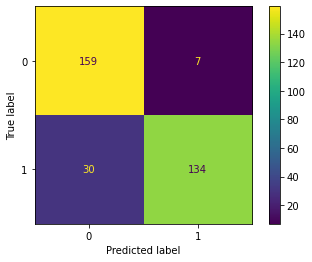

ROC-Curve


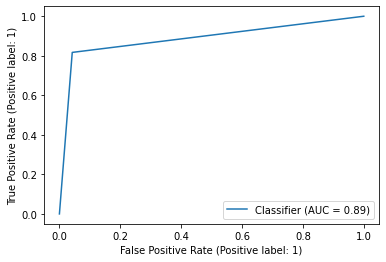

In [14]:
log_model = LogisticRegression()

# training
log_model.fit(X_train, y_train)


# Accuracy scores
log_accuracy_train = accuracy_score(y_train, log_model.predict(X_train))
print(f"Accuracy with Training data: {log_accuracy_train}")

log_y_pred = log_model.predict(X_test)
log_accuracy_test = accuracy_score(y_test, log_y_pred)
print(f"Accuracy with test data: {log_accuracy_test}")


# confusing matrix 
print("Confusion Matrix for Logistic Regression Classifier Model: ")
cm_log = confusion_matrix(y_test, log_y_pred)
print(cm_log)


# classification report
print("Classification Report for Logistic Regression Classifier model: ")
print(classification_report(y_test, log_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, log_y_pred)
plt.show()


#ROC curve
print("ROC-Curve")
RocCurveDisplay.from_predictions(y_test, log_y_pred)
plt.show()


tp_log = cm_log[0,0]
fp_log = cm_log[0,1]
tn_log = cm_log[1,1]
fn_log = cm_log[1,0]

## Naive Bayes Model (Training and Evaluation)

Accuracy with Training data: 0.9671641791044776
Accuracy with test data: 0.9666666666666667
Confusion Matrix for  Naive Bayes Classifier Model: 
[[162   4]
 [  7 157]]
Classification Report for  Naive Bayes Classifier model: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       166
           1       0.98      0.96      0.97       164

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



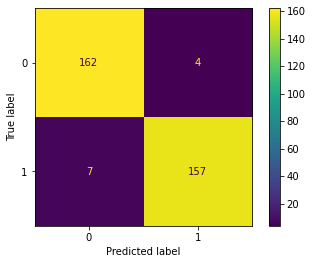

ROC-Curve


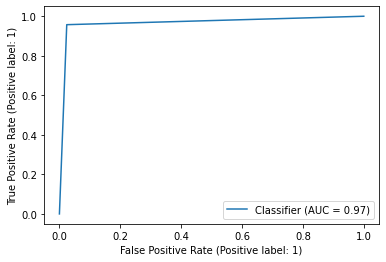

In [15]:
nb_model = GaussianNB()

# training
nb_model.fit(X_train, y_train)


# Accuracy scores
nb_accuracy_train = accuracy_score(y_train, nb_model.predict(X_train))
print(f"Accuracy with Training data: {nb_accuracy_train}")

nb_y_pred = nb_model.predict(X_test)
nb_accuracy_test = accuracy_score(y_test, nb_y_pred)
print(f"Accuracy with test data: {nb_accuracy_test}")


# confusing matrix 
print("Confusion Matrix for  Naive Bayes Classifier Model: ")
cm_nb = confusion_matrix(y_test, nb_y_pred)
print(cm_nb)


# classification report
print("Classification Report for  Naive Bayes Classifier model: ")
print(classification_report(y_test, nb_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, nb_y_pred)
plt.show()


#ROC curve
print("ROC-Curve")
RocCurveDisplay.from_predictions(y_test, nb_y_pred)
plt.show()


tp_nb = cm_nb[0,0]
fp_nb = cm_nb[0,1]
tn_nb = cm_nb[1,1]
fn_nb = cm_nb[1,0]

### Measuring The Error and Comparing Metrics

In [16]:
#### Measuring The Error and Comparing Metrics
models = [
    ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, nb_accuracy_train, nb_accuracy_test),
    ('Logistic Regression', tp_log, fp_log, tn_log, fn_log, log_accuracy_train, log_accuracy_test)
]
model_performance = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               ])

model_performance.T

,0,1
Model,Naive Bayes,Logistic Regression
True Positive,162,159
False Positive,4,7
True Negative,157,134
False Negative,7,30
Accuracy(training),0.967164,0.895522
Accuracy(test),0.966667,0.887879


### Visualizing Models Performance

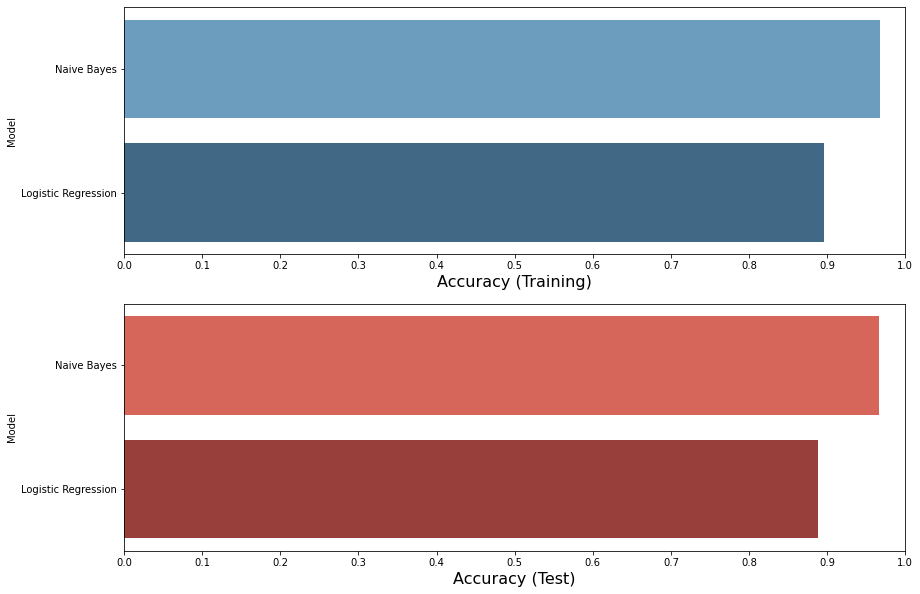

In [17]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_performance.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data=model_performance, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_performance.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data=model_performance, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()


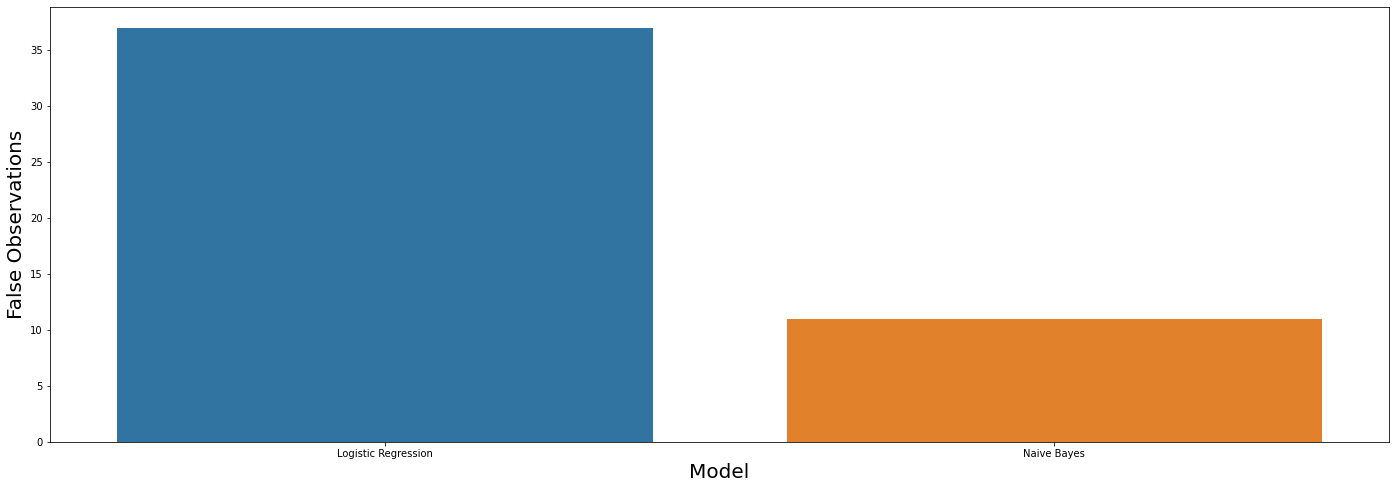

In [18]:
model_performance.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_performance['Model'], y=model_performance['False Positive'] + model_performance['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()
